In [1]:
import numpy as np
from PIL import Image
import os

In [2]:
# load the dataset
data = []
labels = []
ind = 0

# load each file from the directory and flatten the data
for root, dirs, files in os.walk('/Users/akshatgupta/Desktop/IIITD/SEM_4/SML/dataset/trainingSet'):
  for f in files:
    if f.endswith('.jpg'):
      img = Image.open(os.path.join(root,f))
      img = np.array(img)[:,:]
      img = np.reshape(img, (img.shape[0] * img.shape[1]))
      labels.append(ind)
      data.append(img)
  ind += 1

data = np.array(data)
labels = np.array(labels)

# split the dataset into 80:20 as training and testing data
split = int(0.8*data.shape[0])
training = data[:split]
testing = data[split:]
trlabels = labels[:split]
testlabels = labels[split:]

In [26]:
def pca(data):

  # standardise the data (convert to standard normal)
  Z = (data - np.mean(data,axis=0))/np.std(data,axis=0)

  # compute the covariance matrix of Z
  cov = np.cov(Z,rowvar=False)

  # compute the eigenvectors and eigenvalues of the covariance matrix
  evals, evecs = np.linalg.eig(cov)

  # order the eigenvalues and corresponding eigenvectors in order of
  # decreasing eigenvalues
  sel = np.argsort(evals)[::-1]
  evals = np.sort(evals)[::-1]
  evecs = evecs[:,sel]

  P = evecs[:,:]

  # project the data along the PC's axes i.e. multiply Z by P
  # where P is formed by choosing the components from the
  # eigenvector-matrix in order of decreasing eigenvalue
  PC = np.dot(Z,P)

  return PC,evals

In [9]:
def knn(train,test,k):
  # labels determined by kNN
  knn_labels = np.zeros(test.shape[0])

  # distance of each test point from each training point
  dist = np.zeros((test.shape[0],train.shape[0]))
  for i,x in enumerate(test):
    dist[i] = np.sum((train - x)**2, axis = 1)

  # find the k nearest neighbors for each test point  
  nearest = trlabels[np.argsort(dist,axis=1)[:,:k]]

  # return the predicted labels for each test point
  knn_labels = np.array([np.bincount(label).argmax() for label in nearest])

  return knn_labels

In [27]:
# pca for training set
tr_pca,tr_evals = pca(training)
test_pca,test_evals = pca(testing)

# pca for k = 5
tr1 = tr_pca[:,:5]
te1 = test_pca[:,:5]
# pca for k = 25
tr2 = tr_pca[:,:25]
te2 = test_pca[:,:25]
# pca for k = 125
tr3 = tr_pca[:,:125]
te3 = test_pca[:,:125]

In [31]:
k = 100
# call kNN on the original features
orig = knn(training,testing,k)

# call kNN on the transformed features
k1 = knn(tr1,te1,k)
k2 = knn(tr2,te2,k)
k3 = knn(tr3,te3,k)

KeyboardInterrupt: 

In [ ]:
# define accuracy of each kNN as the number of test labels
# it predicts correctly
acc1 = np.count_nonzero(np.equal(k1,testlabels))
acc2 = np.count_nonzero(np.equal(k2,testlabels))
acc3 = np.count_nonzero(np.equal(k3,testlabels))

print("Classification accuracies for:")
print("5 dimensions = ",100.0*acc1/len(testlabels))
print("25 dimensions = ",100.0*acc2/len(testlabels))
print("125 dimensions = ",100.0*acc3/len(testlabels))

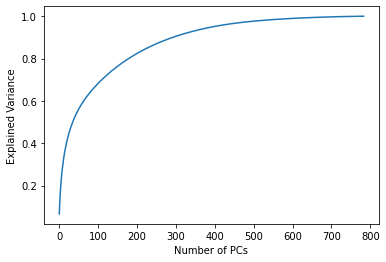

In [28]:
import matplotlib.pyplot as plt

# sum of all eigenvalues
s = np.sum(tr_evals)

# cumulative sum of ratio of eigenvalues to the total sum
cum_sum = np.cumsum(tr_evals/s)

plt.plot(range(len(tr_evals)),cum_sum)
plt.xlabel("Number of PCs")
plt.ylabel("Explained Variance")
plt.show()

In [12]:
# minimum number of PCs required to cover at least 80% of variance
min_num = np.argmax(cum_sum >= 0.8) + 1
print("Minimum number of PCs required to cover at least 80% of variance = ",min_num)

Minimum number of PCs required to cover at least 80% of variance =  180
